In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import io
import requests

dataset_name = 'demographic'
api_url = f'https://uidai.sreecharandesu.in/api/datasets/{dataset_name}'
local_path = f'../public/datasets/{dataset_name}_full.csv'

try:
    print(f'Attempting to fetch data from API: {api_url}')
    response = requests.get(api_url)
    response.raise_for_status()
    df = pd.read_csv(io.StringIO(response.text))
    print('Successfully loaded data from API')
except Exception as e:
    print(f'API unavailable or failed ({e}). Falling back to local CSV: {local_path}')
    try:
        df = pd.read_csv(local_path, on_bad_lines='skip', low_memory=False)
        print('Successfully loaded data from local CSV')
    except FileNotFoundError:
        print(f'Error: Local file {local_path} not found. Please ensure data is synced.')
        # Create empty dataframe as fallback to prevent crash
        df = pd.DataFrame()


/Users/sreecharandesu/Projects/uidai-data-sync/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Attempting to fetch data from API: https://uidai.sreecharandesu.in/api/datasets/demographic
Successfully loaded data from API


In [3]:
df.shape

(2375880, 6)

In [4]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [5]:
df['state'].unique()

array(['West Bengal', 'Manipur', 'Rajasthan', 'Himachal Pradesh',
       'Telangana', 'Kerala', 'Uttar Pradesh', 'Madhya Pradesh', 'Bihar',
       'Karnataka', 'Maharashtra', 'Punjab', 'Gujarat', 'Assam',
       'Haryana', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh',
       'Andhra Pradesh', 'Uttarakhand', 'Mizoram', 'Chhattisgarh',
       'Jharkhand', 'Jammu and Kashmir', 'Delhi', 'Goa', 'Tripura',
       'Chandigarh', 'Sikkim', 'Nagaland', 'Meghalaya', 'Puducherry',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Lakshadweep'], dtype=object)

In [6]:
df['state'].nunique()

36

In [7]:
df['district'].unique()

array(['Murshidabad', 'Thoubal', 'Sirohi', 'Hooghly', 'Una', 'Sangareddy',
       'Kannur', 'Jaipur', 'Varanasi', 'Budaun', 'Tikamgarh', 'Fatehpur',
       'Supaul', 'Ramanagar', 'Thiruvananthapuram', 'Mandsaur',
       'Pilibhit', 'Buldhana', 'Fatehgarh Sahib', 'Ratlam', 'Gandhinagar',
       'Samastipur', 'Indore', 'Gwalior', 'Kollam', 'Siwan', 'Goalpara',
       'Yamuna Nagar', 'Tiruvannamalai', 'Nirmal', 'Rajkot', 'Kachchh',
       'Mayurbhanj', 'Papum Pare', 'Jalandhar', 'N. T. R', 'Nalbari',
       'Nashik', 'Palghar', 'Vizianagaram', 'Dharwad', 'Almora',
       'Jaisalmer', 'Nagpur', 'Kalaburagi', 'Kolkata', 'Nagaur', 'Kolar',
       'Tiruvallur', 'Puri', 'Deoria', 'Agar Malwa', 'Belagavi',
       'Navsari', 'Mamit', 'Hanumakonda', 'Jodhpur', 'Balaghat', 'Sikar',
       'Udham Singh Nagar', 'Bara Banki', 'Nadia', 'Nalanda',
       'Perambalur', 'Harda', 'Panchmahals', 'Thanjavur', 'Tumakuru',
       'Rajanna Sircilla', 'Ganjam', 'Ananthapuramu', 'Rangareddy',
       'Y.S.R. Kada

In [8]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [9]:
df.shape

(2375880, 6)

In [10]:
# Standard list of Indian States and Union Territories (as per GoI)
STANDARD_STATES_UTS = {
    "Andhra Pradesh",
    "Arunachal Pradesh",
    "Assam",
    "Bihar",
    "Chhattisgarh",
    "Goa",
    "Gujarat",
    "Haryana",
    "Himachal Pradesh",
    "Jharkhand",
    "Karnataka",
    "Kerala",
    "Madhya Pradesh",
    "Maharashtra",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Odisha",
    "Punjab",
    "Rajasthan",
    "Sikkim",
    "Tamil Nadu",
    "Telangana",
    "Tripura",
    "Uttar Pradesh",
    "Uttarakhand",
    "West Bengal",
    # Union Territories
    "Andaman And Nicobar Islands",
    "Chandigarh",
    "Dadra And Nagar Haveli And Daman And Diu",
    "Delhi",
    "Jammu And Kashmir",
    "Ladakh",
    "Lakshadweep",
    "Puducherry"
}


In [11]:
#Text standardization
df["state"] = (
    df["state"]
    .astype(str)
    .str.strip()
    .str.title()
)

df["district"] = (
    df["district"]
    .astype(str)
    .str.strip()
    .str.title()
)

df["pincode"] = df["pincode"].astype(str).str.strip()


In [12]:
df["state"].unique()

array(['West Bengal', 'Manipur', 'Rajasthan', 'Himachal Pradesh',
       'Telangana', 'Kerala', 'Uttar Pradesh', 'Madhya Pradesh', 'Bihar',
       'Karnataka', 'Maharashtra', 'Punjab', 'Gujarat', 'Assam',
       'Haryana', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh',
       'Andhra Pradesh', 'Uttarakhand', 'Mizoram', 'Chhattisgarh',
       'Jharkhand', 'Jammu And Kashmir', 'Delhi', 'Goa', 'Tripura',
       'Chandigarh', 'Sikkim', 'Nagaland', 'Meghalaya', 'Puducherry',
       'Ladakh', 'Dadra And Nagar Haveli And Daman And Diu',
       'Andaman And Nicobar Islands', 'Lakshadweep'], dtype=object)

In [13]:
df['state'].nunique()

36

In [14]:
# Official list of Indian States and Union Territories
INDIA_STATES_UT = {
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
    "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand",
    "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
    "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
    "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
    "Uttar Pradesh", "Uttarakhand", "West Bengal",

    # Union Territories
    "Andaman And Nicobar Islands", "Chandigarh",
    "Dadra And Nagar Haveli And Daman And Diu",
    "Delhi", "Jammu And Kashmir", "Ladakh",
    "Lakshadweep", "Puducherry"
}


In [15]:
#Each district has MANY pincodes
df[df['district'] == 'Mahabubnagar'][['district','pincode','state']].drop_duplicates()

,district,pincode,state
429,Mahabubnagar,509340,Telangana
440,Mahabubnagar,509311,Telangana
678,Mahabubnagar,509104,Telangana
701,Mahabubnagar,509206,Telangana
804,Mahabubnagar,509385,Telangana
...,...,...,...
2191657,Mahabubnagar,509131,Andhra Pradesh
2217711,Mahabubnagar,509311,Andhra Pradesh
2240103,Mahabubnagar,509209,Andhra Pradesh
2323868,Mahabubnagar,509201,Andhra Pradesh


In [16]:
district_state_check = (
    df.groupby(['district', 'pincode'])['state']
      .nunique()
      .reset_index()
)

district_state_check['state'].value_counts()


state
1    27855
2      640
Name: count, dtype: int64

For 28,786 (district, pincode) pairs
 that pincode appears in ONLY ONE state
1438 rows  Same district + pincode appears in TWO states
9 rows Same pincode is mapped to 3 states

In [17]:
# Find invalid state values
#Values in dataset that are NOT valid states
invalid_states = sorted(
    set(df["state"].unique()) - INDIA_STATES_UT
)

len(invalid_states), invalid_states


(0, [])

In [18]:
# Flag rows where state is invalid
df["state_needs_correction"] = ~df["state"].isin(INDIA_STATES_UT)

df["state_needs_correction"].value_counts()
df[df["state_needs_correction"] == True]["state"].unique()


array([], dtype=object)

In [19]:
df[df["state_needs_correction"]].head(10)


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [20]:
df[df["state"] == "Jaipur"].head(10)


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [21]:
df[df["state"]=="Puttenahalli"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [22]:
df[df["state"]=="Raja Annamalai Puram"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [23]:
df[df["state"]=="Darbhanga"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [24]:
df[df["state"]=="Balanagar"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [25]:
df[df["state"]=="Madanapalle"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [26]:
df[df["state"]=="Nagpur"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [27]:
df[df["state"]=="Andhra Pradesh"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
35,01-03-2025,Andhra Pradesh,N. T. R,520010,27,319,False
40,01-03-2025,Andhra Pradesh,Vizianagaram,535579,29,485,False
77,01-03-2025,Andhra Pradesh,Ananthapuramu,515556,10,184,False
78,01-03-2025,Andhra Pradesh,Rangareddy,500037,28,161,False
79,01-03-2025,Andhra Pradesh,Y.S.R. Kadapa,516309,10,69,False
96,01-03-2025,Andhra Pradesh,Kurnool,518220,20,240,False
97,01-03-2025,Andhra Pradesh,Ananthapuramu,515761,52,274,False
101,01-03-2025,Andhra Pradesh,Adilabad,504299,25,528,False
140,01-03-2025,Andhra Pradesh,Sri Sathya Sai,515201,74,374,False
146,01-03-2025,Andhra Pradesh,West Godavari,534166,18,269,False


In [28]:
STATE_ALIASES = {
    "Orissa": "Odisha",
    "West Bengal ": "West Bengal",
    "Westbengal": "West Bengal",
    "West Bengli": "West Bengal",
    "West Bengal.": "West Bengal",

    "Daman & Diu": "Dadra And Nagar Haveli And Daman And Diu",
    "Dadra And Nagar Haveli": "Dadra And Nagar Haveli And Daman And Diu",

    "Pondicherry": "Puducherry",
    "Uttaranchal": "Uttarakhand"
}

df["state"] = df["state"].replace(STATE_ALIASES)


In [29]:
df["state"].nunique()

36

In [30]:
df["state_needs_correction"] = ~df["state"].isin(INDIA_STATES_UT)

df["state_needs_correction"].value_counts()


state_needs_correction
False    2375880
Name: count, dtype: int64

In [31]:
#Build PINCODE → STATE mapping
#For each pincode, look at rows where state is already correct.
#Among those, which state appears most frequently for that pincode
pincode_state_map = (
    df[~df["state_needs_correction"]]   # only trusted rows
    .groupby("pincode")["state"]
    .agg(lambda x: x.value_counts().idxmax())
)


In [32]:
def fix_state(row):
    if row["state_needs_correction"]:
        return pincode_state_map.get(row["pincode"], row["state"])
    return row["state"]

df["state"] = df.apply(fix_state, axis=1)


In [33]:
remaining_invalid = set(df["state"].unique()) - INDIA_STATES_UT
remaining_invalid


set()

In [34]:
set(df["state"].unique())


{'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [35]:
df[df["state"]=="100000"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction


In [36]:
df = df[~df["state"].eq("100000")]


In [37]:
set(df["state"].unique()) - INDIA_STATES_UT


set()

In [38]:
set(df["state"].unique())


{'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [39]:
df['state'].nunique()

36

In [40]:
df.isnull().sum()

date                      0
state                     0
district                  0
pincode                   0
demo_age_5_17             0
demo_age_17_              0
state_needs_correction    0
dtype: int64

In [41]:
state_activity = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

# Total Aadhaar activity
state_activity["total_activity"] = (
    state_activity["demo_age_5_17"] + state_activity["demo_age_17_"]
)

state_activity.sort_values("total_activity", ascending=False).head(10)


,state,demo_age_5_17,demo_age_17_,total_activity
33,Uttar Pradesh,738448,8088103,8826551
20,Maharashtra,254472,4869985,5124457
4,Bihar,331766,4464474,4796240
35,West Bengal,216432,3758943,3975375
19,Madhya Pradesh,384548,2475395,2859943
28,Rajasthan,243006,2568503,2811509
30,Tamil Nadu,315658,2087457,2403115
1,Andhra Pradesh,287629,1925372,2213001
6,Chhattisgarh,159290,1764413,1923703
10,Gujarat,199239,1675617,1874856


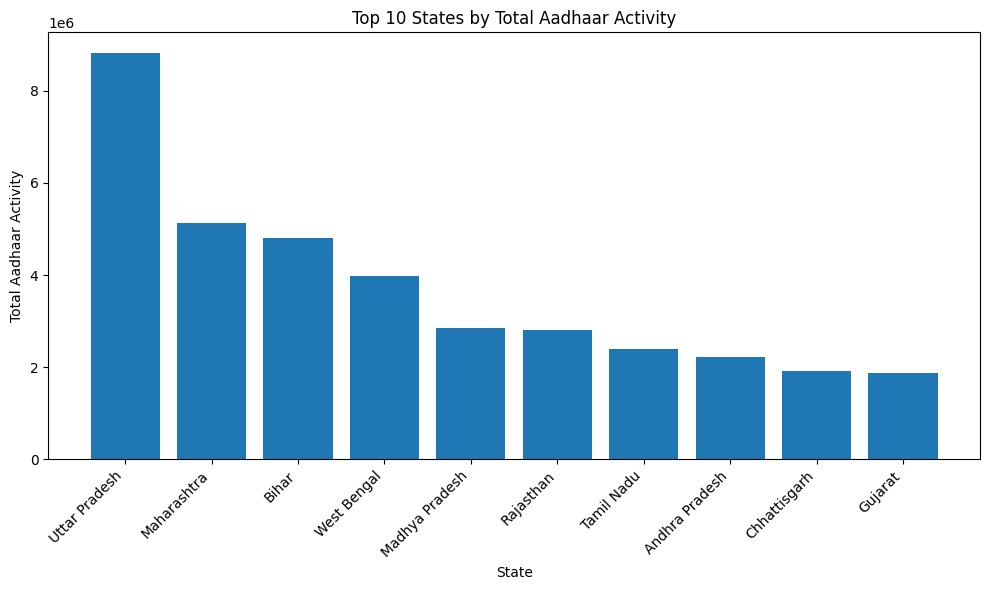

In [42]:
import matplotlib.pyplot as plt

top_states = state_activity.sort_values(
    "total_activity", ascending=False
).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_states["state"], top_states["total_activity"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Top 10 States by Total Aadhaar Activity")
plt.tight_layout()
plt.show()


Observation:
States such as Uttar Pradesh, Maharashtra, and Madhya Pradesh show the highest Aadhaar activity.

Interpretation:
Higher activity largely reflects population size and administrative scale rather than higher per-capita engagement.

Implication:
Absolute counts should be complemented with percentage-based analysis to assess demographic balance.

In [43]:
state_activity = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

# Total Aadhaar activity
state_activity["total_activity"] = (
    state_activity["demo_age_5_17"] + state_activity["demo_age_17_"]
)

state_activity.head()


,state,demo_age_5_17,demo_age_17_,total_activity
0,Andaman And Nicobar Islands,559,6266,6825
1,Andhra Pradesh,287629,1925372,2213001
2,Arunachal Pradesh,5373,29384,34757
3,Assam,79582,924788,1004370
4,Bihar,331766,4464474,4796240


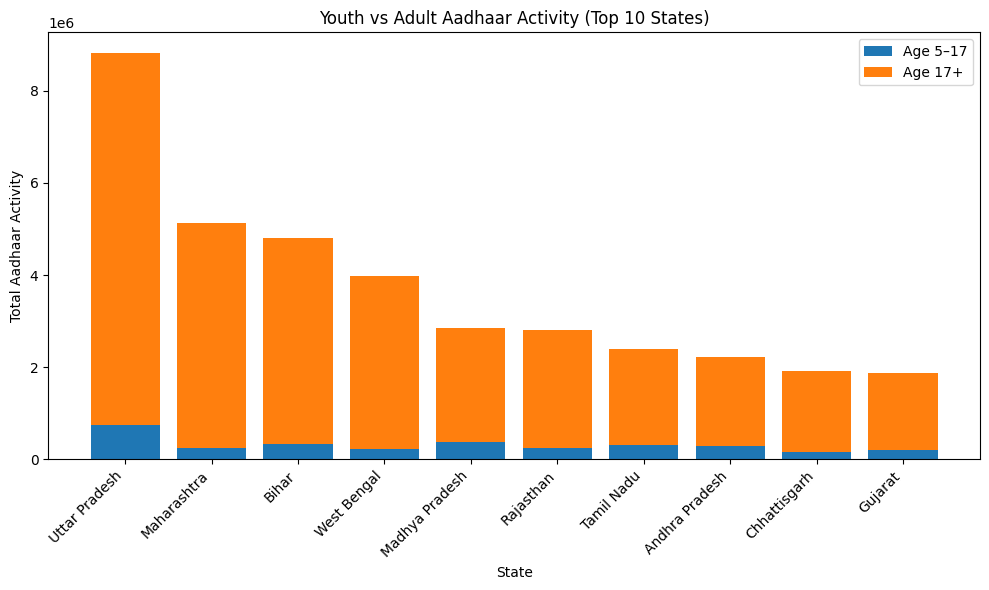

In [44]:
import matplotlib.pyplot as plt

top_states = (
    state_activity
    .sort_values("total_activity", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))

plt.bar(
    top_states["state"],
    top_states["demo_age_5_17"],
    label="Age 5–17"
)

plt.bar(
    top_states["state"],
    top_states["demo_age_17_"],
    bottom=top_states["demo_age_5_17"],
    label="Age 17+"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Youth vs Adult Aadhaar Activity (Top 10 States)")
plt.legend()
plt.tight_layout()
plt.show()


Observations:

Adult Aadhaar activity (17+) dominates across all major states.
Youth Aadhaar activity forms a smaller but consistent base.
States with high total activity show similar age-group patterns.

Interpretation:

Aadhaar usage is currently more update-driven among adults.
Youth activity mainly reflects enrollment rather than frequent updates.
Population-heavy states amplify adult activity volumes.

Implication:
Aadhaar service infrastructure must continue prioritizing adult update workflows.
Dedicated youth enrollment initiatives (schools, child services) can improve early-age coverage.

In [45]:
#for relative youth participation -converting into percentages
state_activity["youth_percentage"] = (
    state_activity["demo_age_5_17"] / state_activity["total_activity"]
) * 100


In [46]:
top_youth_states = (
    state_activity
    .sort_values("youth_percentage", ascending=False)
    .head(10)
)

top_youth_states[["state", "youth_percentage"]]


,state,youth_percentage
17,Ladakh,21.130390
2,Arunachal Pradesh,15.458757
5,Chandigarh,14.637896
15,Karnataka,14.546601
7,Dadra And Nagar Haveli And Daman And Diu,14.193046
13,Jammu And Kashmir,13.925903
31,Telangana,13.586631
19,Madhya Pradesh,13.446002
26,Puducherry,13.264219
21,Manipur,13.215031


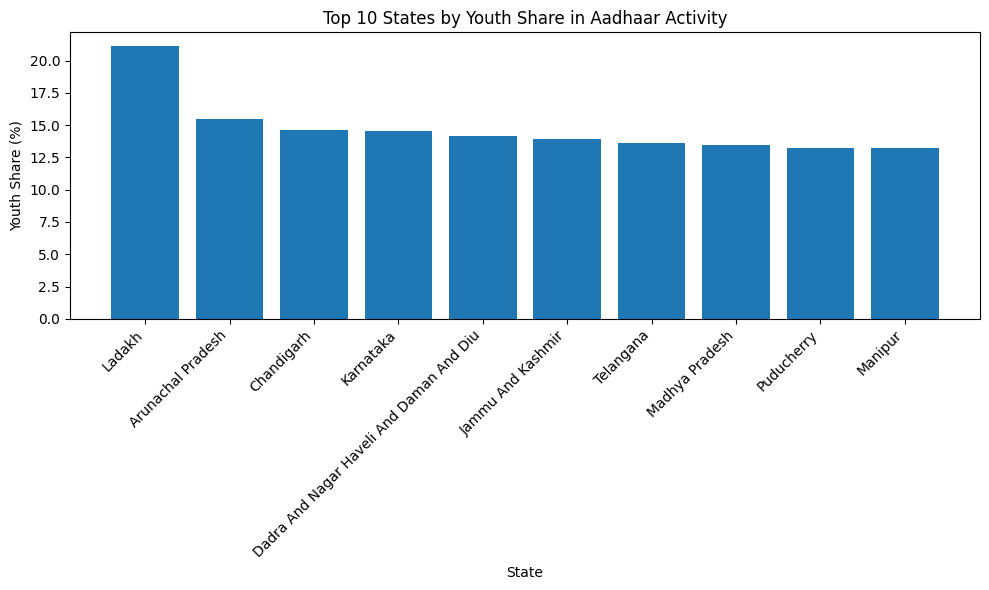

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top_youth_states["state"], top_youth_states["youth_percentage"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Youth Share (%)")
plt.title("Top 10 States by Youth Share in Aadhaar Activity")
plt.tight_layout()
plt.show()


Observation:
Smaller states and Union Territories such as Ladakh, Puducherry, and Chandigarh show a higher percentage of youth Aadhaar activity.
Some larger states like Karnataka and Tamil Nadu also demonstrate relatively strong youth participation.
High-population states do not necessarily lead in youth share.

In [48]:
df["district"].nunique()

913

In [49]:
df["district"].value_counts().head(40)


district
Ananthapuramu         21865
Bengaluru             20623
Bardhaman             20505
Belagavi              18378
North 24 Parganas     14467
Rangareddy            14459
Pune                  14157
Thrissur              14134
East Godavari         13105
Ahilyanagar           12589
Karimnagar            12217
Ernakulam             11484
Ahmedabad             11376
Hooghly               11281
Hyderabad             11247
Palakkad              11218
Thiruvananthapuram    11125
Y.S.R. Kadapa         11070
Warangal              10985
Mysuru                10629
Medak                 10463
Tirunelveli           10355
Tumakuru              10222
Coimbatore            10153
West Godavari         10133
Vellore               10024
Nalgonda              10023
Howrah                10018
Kollam                 9961
Guntur                 9860
Kottayam               9776
Krishna                9651
Kancheepuram           9507
Malappuram             9507
Alappuzha              9460
Ganjam     

In [50]:
df["district"].sample(20, random_state=42)

44465                 Sivaganga
30804                Shivamogga
1887773                 Solapur
36667                Samastipur
1908242                 Birbhum
875115                   Bhopal
185422                 Adilabad
234019               Chandigarh
1977646                Vaishali
539316                  Kannauj
712686                  Birbhum
723244                 Varanasi
1532332                Puruliya
1487254                 Chennai
693129           Uttara Kannada
663287                    Churu
1621669                Vadodara
1560667    Parvathipuram Manyam
2206359               Bhavnagar
854309               Coimbatore
Name: district, dtype: object

In [51]:
#Numeric districts
df[df["district"].str.isnumeric() == True]["district"].value_counts()


district
561203    1
Name: count, dtype: int64

In [52]:
#Very short names
df[df["district"].str.len() < 3]["district"].value_counts()


Series([], Name: count, dtype: int64)

In [53]:
df["district"].astype(str).str.lower().unique()[:50]


array(['murshidabad', 'thoubal', 'sirohi', 'hooghly', 'una', 'sangareddy',
       'kannur', 'jaipur', 'varanasi', 'budaun', 'tikamgarh', 'fatehpur',
       'supaul', 'ramanagar', 'thiruvananthapuram', 'mandsaur',
       'pilibhit', 'buldhana', 'fatehgarh sahib', 'ratlam', 'gandhinagar',
       'samastipur', 'indore', 'gwalior', 'kollam', 'siwan', 'goalpara',
       'yamuna nagar', 'tiruvannamalai', 'nirmal', 'rajkot', 'kachchh',
       'mayurbhanj', 'papum pare', 'jalandhar', 'n. t. r', 'nalbari',
       'nashik', 'palghar', 'vizianagaram', 'dharwad', 'almora',
       'jaisalmer', 'nagpur', 'kalaburagi', 'kolkata', 'nagaur', 'kolar',
       'tiruvallur', 'puri'], dtype=object)

In [54]:
df["district"].value_counts().head(100)


district
Ananthapuramu        21865
Bengaluru            20623
Bardhaman            20505
Belagavi             18378
North 24 Parganas    14467
                     ...  
Kanniyakumari         6051
Erode                 5951
Vizianagaram          5918
Jalgaon               5822
Sangli                5800
Name: count, Length: 100, dtype: int64

In [55]:
#Preserve original district
df['district_raw']=df['district']

In [56]:
#To make same district names comparable, even if written differently.
import re
import pandas as pd

def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9\s]', ' ', x)   # remove symbols
    x = re.sub(r'\s+', ' ', x)          # normalize spaces
    return x

df['district_norm'] = df['district_raw'].apply(normalize_text)


In [57]:
df[["district_raw", "district_norm"]].sample(20, random_state=42)


,district_raw,district_norm
44465,Sivaganga,sivaganga
30804,Shivamogga,shivamogga
1887773,Solapur,solapur
36667,Samastipur,samastipur
1908242,Birbhum,birbhum
875115,Bhopal,bhopal
185422,Adilabad,adilabad
234019,Chandigarh,chandigarh
1977646,Vaishali,vaishali
539316,Kannauj,kannauj


In [58]:
#To detect duplicates that look different but mean the same thing
def district_key(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9]', '', x)
    return x

df['district_key'] = df['district_norm'].apply(district_key)


In [59]:
dup_districts = (
    df.groupby('district_key')['district_raw']
      .nunique()
      .sort_values(ascending=False)
)

dup_districts[dup_districts > 1].head(30)


district_key
janjgirchampa     3
sasnagarmohali    2
sabarkantha       2
surendranagar     2
barabanki         2
kaimurbhabua      2
raebareli         2
mahabubnagar      2
yamunanagar       2
panchmahals       2
Name: district_raw, dtype: int64

In [60]:
DISTRICT_ALIAS_MAP = {
    # Karnataka
    'bangalore': 'Bengaluru',
    'belgaum': 'Belagavi',
    'shimoga': 'Shivamogga',
    'mysore': 'Mysuru',

    # West Bengal
    'hugli': 'Hooghly',

    # Tamil Nadu
    'tuticorin': 'Thoothukkudi',

    # Andhra Pradesh / Telangana
    'ysr': 'Y.S.R. Kadapa',
    'y s r': 'Y.S.R. Kadapa',
    'cuddapah': 'Y.S.R. Kadapa',
    'k v rangareddy': 'K.V. Rangareddy',

    # Uttar Pradesh
    'allahabad': 'Prayagraj',

    # MP / Maharashtra
    'ahmed nagar': 'Ahilyanagar',
    'hoshangabad': 'Narmadapuram',
}


In [61]:
df['district_clean'] = (
    df['district_norm']
      .replace(DISTRICT_ALIAS_MAP)
      .str.title()
)


In [62]:
DISTRICT_MERGE_MAP = {
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',
    'East Medinipur': 'Purba Medinipur',

    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',
}


In [63]:
df['district_clean'] = df['district_clean'].replace(DISTRICT_MERGE_MAP)


In [64]:
df['district_clean'].nunique()

908

In [65]:
invalid = ['', 'East', 'West', 'North', 'South', 'North East']
df.loc[df['district_clean'].isin(invalid), 'district_clean'] = None


In [66]:
df['district_clean'].nunique()

903

In [67]:
df.drop(columns=['district', 'district_norm', 'district_key'], inplace=True)
df.rename(columns={'district_clean': 'district'}, inplace=True)


In [68]:
print("Unique districts after cleaning:", df['district'].nunique())
df['district'].value_counts().head(50)


Unique districts after cleaning: 903


district
Ananthapuramu         21865
Bengaluru             20623
Bardhaman             20505
Belagavi              18378
North 24 Parganas     14467
Rangareddy            14459
Pune                  14157
Thrissur              14134
Purba Medinipur       14017
East Godavari         13105
Ahilyanagar           12589
Karimnagar            12217
Paschim Medinipur     12015
Ernakulam             11484
Ahmedabad             11376
Hooghly               11281
Hyderabad             11247
Palakkad              11218
Thiruvananthapuram    11125
Y S R Kadapa          11070
Warangal              10985
Mysuru                10629
Medak                 10463
Tirunelveli           10355
Tumakuru              10222
Coimbatore            10153
West Godavari         10133
Vellore               10024
Nalgonda              10023
Howrah                10018
Kollam                 9961
Guntur                 9860
Kottayam               9776
Krishna                9651
Kancheepuram           9507
Malappuram 

In [69]:
df['district'].unique()

array(['Murshidabad', 'Thoubal', 'Sirohi', 'Hooghly', 'Una', 'Sangareddy',
       'Kannur', 'Jaipur', 'Varanasi', 'Budaun', 'Tikamgarh', 'Fatehpur',
       'Supaul', 'Ramanagar', 'Thiruvananthapuram', 'Mandsaur',
       'Pilibhit', 'Buldhana', 'Fatehgarh Sahib', 'Ratlam', 'Gandhinagar',
       'Samastipur', 'Indore', 'Gwalior', 'Kollam', 'Siwan', 'Goalpara',
       'Yamuna Nagar', 'Tiruvannamalai', 'Nirmal', 'Rajkot', 'Kachchh',
       'Mayurbhanj', 'Papum Pare', 'Jalandhar', 'N T R', 'Nalbari',
       'Nashik', 'Palghar', 'Vizianagaram', 'Dharwad', 'Almora',
       'Jaisalmer', 'Nagpur', 'Kalaburagi', 'Kolkata', 'Nagaur', 'Kolar',
       'Tiruvallur', 'Puri', 'Deoria', 'Agar Malwa', 'Belagavi',
       'Navsari', 'Mamit', 'Hanumakonda', 'Jodhpur', 'Balaghat', 'Sikar',
       'Udham Singh Nagar', 'Bara Banki', 'Nadia', 'Nalanda',
       'Perambalur', 'Harda', 'Panchmahals', 'Thanjavur', 'Tumakuru',
       'Rajanna Sircilla', 'Ganjam', 'Ananthapuramu', 'Rangareddy',
       'Y S R Kadapa'

In [70]:
# 1. Strip spaces
df['district'] = df['district'].str.strip()


In [71]:
df['district'].nunique()

902

In [72]:
SPELLING_FIX_MAP = {
    # Trailing / spacing issues
    'Gondiya ': 'Gondiya',
    'Harda ': 'Harda',
    'Hingoli ': 'Hingoli',
    'Washim ': 'Washim',
    'Udupi ': 'Udupi',
    'Bagalkot ': 'Bagalkot',
    'Garhwa ': 'Garhwa',
    'Dhalai ': 'Dhalai',

    # Known spelling variants
    'Gondia': 'Gondiya',
    'Purnea': 'Purnia',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
    'Darjiling': 'Darjeeling',
    'Ahmadabad': 'Ahmedabad',
    'Rangareddi': 'Rangareddy',

    # West Bengal specifics
    'Koch Bihar': 'Cooch Behar',
    'Maldah': 'Malda',

    # Medinipur variants (already mostly handled, but safe)
    'West Medinipore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',

    # UP legacy names
    'Raebareli': 'Rae Bareli',

    # Telangana / AP
    'Karim Nagar': 'Karimnagar',
    'Mahabub Nagar': 'Mahabubnagar',

    # Minor punctuation drift
    'N T R': 'N.T.R',
}
#apply spelling fixes
df['district']=df['district'].replace(SPELLING_FIX_MAP)


In [73]:
df['district'].nunique()

896

In [74]:
#since , the same pincode appears with different district names 
pincode_district_map = (
    df.dropna(subset=['pincode', 'district'])  # remove rows missing pincode or district
      .groupby('pincode')['district']  # group all rows by pincode
      .agg(lambda x: x.value_counts().idxmax())  # choose the MOST FREQUENT district name
      .to_dict()  # convert to dictionary
)

len(pincode_district_map)


19769

For each pincode:
   -> Look at all district names used
   -> Count how many times each appears
   -> Pick the most common one
   -> Assume that is the correct district


In [75]:
# Apply mapping to correct districts
df['district_final'] = df.apply(
    lambda r: pincode_district_map.get(r['pincode'], r['district']),
    axis=1
)


In [76]:
df['district'] = df['district_final']
df.drop(columns=['district_final'], inplace=True)


In [77]:
df[df['district'].astype(str).str.isnumeric()]['district'].value_counts()


Series([], Name: count, dtype: int64)

In [78]:
junk_patterns = [
    'hospital', 'road', 'bank', 'near', 'behind',
    'colony', 'nagar', 'sector', 'market'
]

df[df['district'].str.lower().str.contains('|'.join(junk_patterns), na=False)][
    'district'
].value_counts().head(20)


district
Mahabubnagar                  19391
Karimnagar                    18138
Ahilyanagar                   12398
Bankura                        6485
Vizianagaram                   6228
Virudhunagar                   5205
Kanpur Nagar                   4542
Bara Banki                     4512
Jamnagar                       4491
Bhavnagar                      4170
Sas Nagar Mohali               3981
Shaheed Bhagat Singh Nagar     3545
Gandhinagar                    3448
Surendra Nagar                 3305
Ramanagar                      3134
Ambedkar Nagar                 2824
Srinagar                       2725
Sant Ravidas Nagar             2687
Ganganagar                     2653
Chamrajanagar                  2489
Name: count, dtype: int64

In [79]:
FINAL_SPELLING_FIX = {
    'Bellary': 'Ballari',
    'Tumkur': 'Tumakuru',
    'Gondia': 'Gondiya',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
}

df['district'] = df['district'].replace(FINAL_SPELLING_FIX)


In [80]:
df['district'].nunique()

784

In [81]:
district_state_check = (
    df.groupby(['district', 'state'])
      .size()
      .reset_index(name='count')
)

district_state_check.sort_values('count', ascending=False).head(20)


,district,state,count
73,Bardhaman,West Bengal,29595
26,Ananthapuramu,Andhra Pradesh,25640
88,Bengaluru,Karnataka,21312
546,North 24 Parganas,West Bengal,19511
86,Belagavi,Karnataka,18376
216,East Godavari,Andhra Pradesh,15629
812,Warangal,Telangana,15614
602,Purba Medinipur,West Bengal,14751
601,Pune,Maharashtra,14210
760,Thrissur,Kerala,14168


In [82]:
district_state_counts = (
    district_state_check
    .groupby('district')['state']
    .nunique()
    .reset_index(name='state_count')
)

conflicting_districts = district_state_counts[
    district_state_counts['state_count'] > 1
]['district']

len(conflicting_districts)


54

In [83]:
district_state_check[
    district_state_check['district'].isin(conflicting_districts)
].sort_values(['district', 'count'], ascending=[True, False]).head(30)


,district,state,count
1,Adilabad,Telangana,7751
0,Adilabad,Andhra Pradesh,3917
13,Alluri Sitharama Raju,Andhra Pradesh,2571
14,Alluri Sitharama Raju,Telangana,34
40,Aurangabad,Maharashtra,6730
39,Aurangabad,Bihar,2908
53,Baleswar,Odisha,4086
54,Baleswar,West Bengal,36
60,Balrampur,Uttar Pradesh,1603
59,Balrampur,Chhattisgarh,1209


In [84]:
pincode_state_map = (
    df.dropna(subset=['pincode', 'state'])
      .groupby('pincode')['state']
      .agg(lambda x: x.value_counts().idxmax())
      .to_dict()
)


In [85]:
def resolve_district_state(district_name):
    # All pincodes used with this district
    pincodes = (
        df.loc[df['district'] == district_name, 'pincode']
          .dropna()
          .unique()
    )

    # Map those pincodes to states
    pincode_states = [
        pincode_state_map[p]
        for p in pincodes
        if p in pincode_state_map
    ]

    # If we have pincode-based evidence → trust it
    if len(pincode_states) > 0:
        return (
            pd.Series(pincode_states)
              .value_counts()
              .idxmax()
        )

    # Fallback: majority state in data
    return (
        district_state_check[
            district_state_check['district'] == district_name
        ]
        .sort_values('count', ascending=False)
        .iloc[0]['state']
    )


In [86]:
final_district_state_map = {}

# First add clean districts
clean_districts = district_state_counts[
    district_state_counts['state_count'] == 1
]['district']

for d in clean_districts:
    final_district_state_map[d] = (
        district_state_check[
            district_state_check['district'] == d
        ].iloc[0]['state']
    )

# Now resolve conflicts
for d in conflicting_districts:
    correct_state = resolve_district_state(d)
    final_district_state_map[d] = correct_state
    print(f"Resolved: {d} → {correct_state}")


Resolved: Adilabad → Telangana
Resolved: Alluri Sitharama Raju → Andhra Pradesh
Resolved: Aurangabad → Maharashtra
Resolved: Baleswar → Odisha
Resolved: Balrampur → Uttar Pradesh
Resolved: Bhadradri Kothagudem → Telangana
Resolved: Bijapur → Karnataka
Resolved: Bijnor → Uttar Pradesh
Resolved: Bilaspur → Himachal Pradesh
Resolved: Chandigarh → Chandigarh
Resolved: Chittoor → Andhra Pradesh
Resolved: Dadra And Nagar Haveli → Dadra And Nagar Haveli And Daman And Diu
Resolved: Daman → Dadra And Nagar Haveli And Daman And Diu
Resolved: East Sikkim → Sikkim
Resolved: Goalpara → Assam
Resolved: Hamirpur → Himachal Pradesh
Resolved: Hanumakonda → Telangana
Resolved: Haridwar → Uttarakhand
Resolved: Hyderabad → Telangana
Resolved: Jagitial → Telangana
Resolved: Kamareddy → Telangana
Resolved: Kamrup → Assam
Resolved: Kannur → Kerala
Resolved: Karaikal → Puducherry
Resolved: Kargil → Jammu And Kashmir
Resolved: Karimnagar → Telangana
Resolved: Khammam → Telangana
Resolved: Kozhikode → Kerala
Re

In [87]:
df['state_corrected'] = df['district'].map(final_district_state_map)


In [88]:
df['state'] = df['state_corrected']
df.drop(columns=['state_corrected'], inplace=True)


In [89]:
df.groupby('district')['state'].nunique().value_counts()


state
1    784
Name: count, dtype: int64

In [90]:
df[df['district'].isin([
    'Adilabad', 'Hyderabad', 'Mahabubnagar',
    'Aurangabad', 'Bilaspur'
])][['district','state']].drop_duplicates()


,district,state
29,Adilabad,Telangana
134,Aurangabad,Maharashtra
332,Hyderabad,Telangana
429,Mahabubnagar,Telangana
442,Bilaspur,Himachal Pradesh


In [91]:
df['district'].unique()

array(['Murshidabad', 'Kakching', 'Sirohi', 'Hooghly', 'Una', 'Medak',
       'Kannur', 'Jaipur', 'Varanasi', 'Budaun', 'Tikamgarh', 'Fatehpur',
       'Supaul', 'Ramanagar', 'Thiruvananthapuram', 'Mandsaur',
       'Pilibhit', 'Buldhana', 'Fatehgarh Sahib', 'Ratlam', 'Gandhinagar',
       'Samastipur', 'Indore', 'Gwalior', 'Kollam', 'Siwan', 'Goalpara',
       'Yamuna Nagar', 'Tiruvannamalai', 'Adilabad', 'Rajkot', 'Kachchh',
       'Mayurbhanj', 'Papum Pare', 'Jalandhar', 'N.T.R', 'Nalbari',
       'Nashik', 'Thane', 'Vizianagaram', 'Dharwad', 'Almora', 'Jodhpur',
       'Nagpur', 'Kalaburagi', 'Kolkata', 'Nagaur', 'Kolar', 'Chennai',
       'Puri', 'Deoria', 'Agar Malwa', 'Belagavi', 'Navsari', 'Mamit',
       'Warangal', 'Balaghat', 'Sikar', 'Udham Singh Nagar', 'Bara Banki',
       'Nalanda', 'Perambalur', 'Harda', 'Panchmahals', 'Thanjavur',
       'Tumakuru', 'Karimnagar', 'Ganjam', 'Ananthapuramu', 'Rangareddy',
       'Y S R Kadapa', 'Chengalpattu', 'Ahmedabad', 'Sonipat',
   

In [92]:
df = df[df['district'].notna()]

In [93]:
df['district'].nunique()

784

In [94]:
df['month'] = (
    pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')
      .dt.to_period('M')
      .astype(str)
)


In [95]:
df[['date', 'month']].head(10)


,date,month
0,01-03-2025,2025-03
1,01-03-2025,2025-03
2,01-03-2025,2025-03
3,01-03-2025,2025-03
4,01-03-2025,2025-03
5,01-03-2025,2025-03
6,01-03-2025,2025-03
7,01-03-2025,2025-03
8,01-03-2025,2025-03
9,01-03-2025,2025-03


In [96]:
df['month'].isna().sum()


np.int64(0)

In [97]:
monthly_state_counts = (
    df.groupby(['month', 'state'])
      .size()
      .reset_index(name='count')
)


In [98]:
monthly_state_counts['month'] = pd.to_datetime(monthly_state_counts['month'])


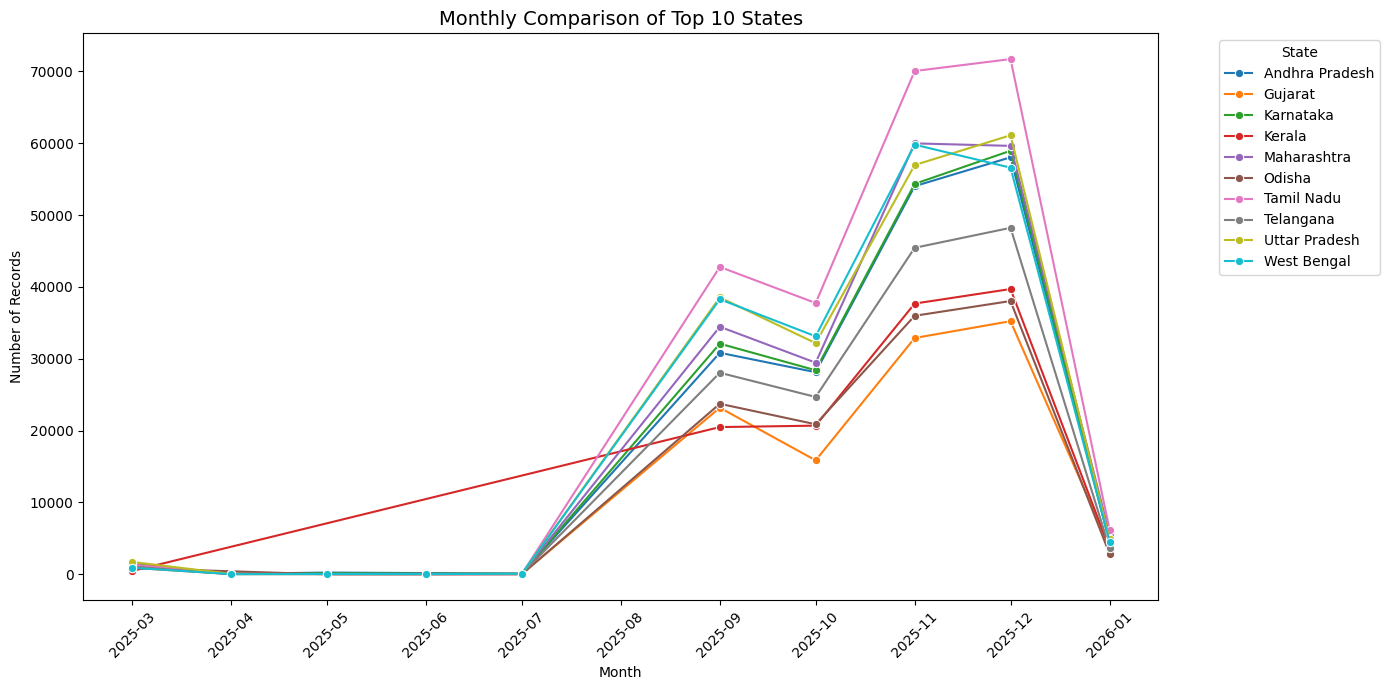

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick top 10 states overall
top_states = (
    df['state']
    .value_counts()
    .head(10)
    .index
)

plot_df = monthly_state_counts[
    monthly_state_counts['state'].isin(top_states)
]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=plot_df,
    x='month',
    y='count',
    hue='state',
    marker='o'
)

plt.title('Monthly Comparison of Top 10 States', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


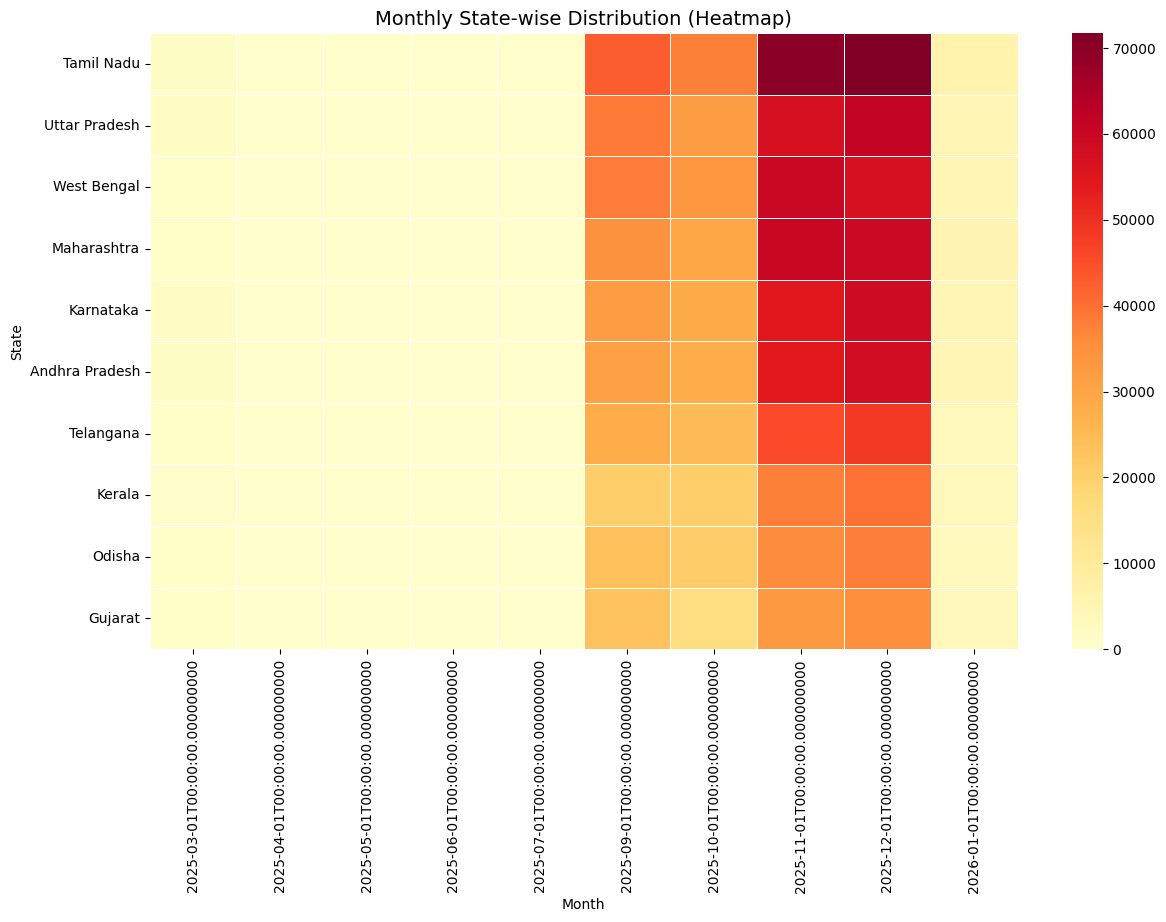

In [100]:
pivot_df = monthly_state_counts.pivot(
    index='state',
    columns='month',
    values='count'
).fillna(0)

# Limit to top 15 states for readability
pivot_df = pivot_df.loc[top_states[:15]]

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_df,
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title('Monthly State-wise Distribution (Heatmap)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('State')
plt.show()


In [101]:
df

,date,state,pincode,demo_age_5_17,demo_age_17_,state_needs_correction,district_raw,district,month
0,01-03-2025,West Bengal,742402,15,165,False,Murshidabad,Murshidabad,2025-03
1,01-03-2025,Manipur,795101,12,114,False,Thoubal,Kakching,2025-03
2,01-03-2025,Rajasthan,307513,18,201,False,Sirohi,Sirohi,2025-03
3,01-03-2025,West Bengal,712311,27,480,False,Hooghly,Hooghly,2025-03
4,01-03-2025,Himachal Pradesh,174301,24,243,False,Una,Una,2025-03
...,...,...,...,...,...,...,...,...,...
2375875,03-01-2026,West Bengal,721145,0,2,False,West Midnapore,Paschim Medinipur,2026-01
2375876,03-01-2026,West Bengal,721149,0,1,False,West Midnapore,Paschim Medinipur,2026-01
2375877,03-01-2026,West Bengal,721212,0,5,False,West Midnapore,Paschim Medinipur,2026-01
2375878,03-01-2026,West Bengal,721242,0,6,False,West Midnapore,Paschim Medinipur,2026-01


In [102]:
df.columns

Index(['date', 'state', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'state_needs_correction', 'district_raw', 'district', 'month'],
      dtype='object')

In [103]:
df['state'].nunique()

36

In [104]:
state_activity = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

# Total Aadhaar activity
state_activity["total_activity"] = (
    state_activity["demo_age_5_17"] + state_activity["demo_age_17_"]
)

state_activity.sort_values("total_activity", ascending=False).head(10)


,state,demo_age_5_17,demo_age_17_,total_activity
33,Uttar Pradesh,744585,8173512,8918097
20,Maharashtra,267997,5034335,5302332
4,Bihar,323133,4377329,4700462
35,West Bengal,216431,3758878,3975309
19,Madhya Pradesh,384548,2475398,2859946
28,Rajasthan,238833,2509878,2748711
30,Tamil Nadu,315396,2085719,2401115
1,Andhra Pradesh,267057,1721434,1988491
31,Telangana,259587,1723466,1983053
10,Gujarat,198989,1674306,1873295


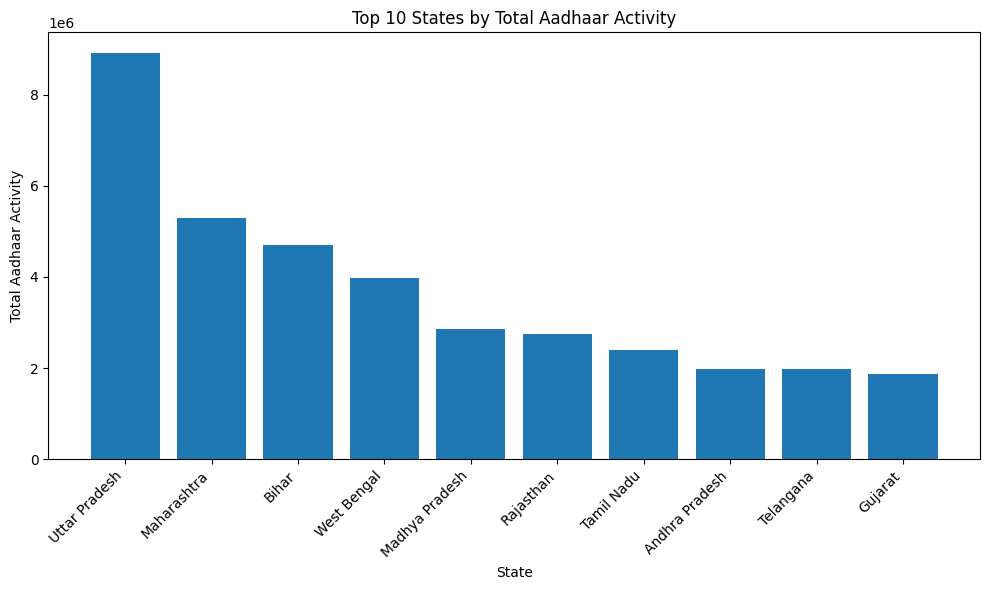

In [105]:
import matplotlib.pyplot as plt

top_states = state_activity.sort_values(
    "total_activity", ascending=False
).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_states["state"], top_states["total_activity"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Top 10 States by Total Aadhaar Activity")
plt.tight_layout()
plt.show()


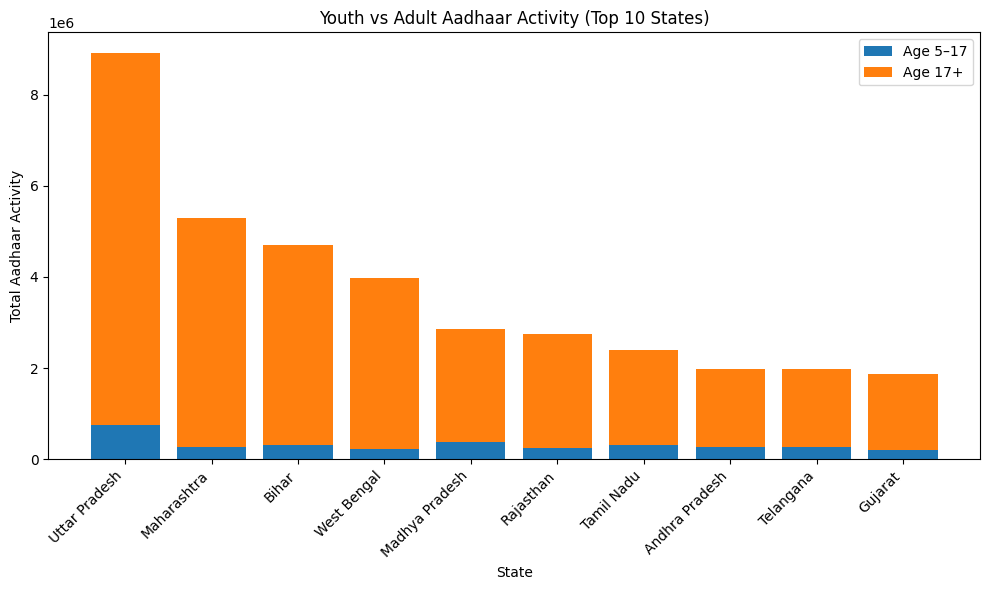

In [106]:
import matplotlib.pyplot as plt

top_states = (
    state_activity
    .sort_values("total_activity", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))

plt.bar(
    top_states["state"],
    top_states["demo_age_5_17"],
    label="Age 5–17"
)

plt.bar(
    top_states["state"],
    top_states["demo_age_17_"],
    bottom=top_states["demo_age_5_17"],
    label="Age 17+"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Youth vs Adult Aadhaar Activity (Top 10 States)")
plt.legend()
plt.tight_layout()
plt.show()
